In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Load & Extract Data

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-25 06:11:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.72MB/s    in 30s     

2020-07-25 06:12:15 (10.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

dir = '/tmp/rockpaperscissors'
print(os.listdir(dir))

['README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'scissors', 'paper']


In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
print(os.listdir(base_dir))

['README_rpc-cv-images.txt', 'rock', 'scissors', 'paper']


In [ ]:
train_scissors_dir = os.path.join(base_dir, 'scissors')
train_paper_dir = os.path.join(base_dir, 'paper')
train_rock_dir = os.path.join(base_dir, 'rock')

# Data Split

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.4,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
  )

In [ ]:
train_generator = datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical',
        subset='training'
)

validation_generator = datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical',
        subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Model CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5,5), activation='relu', input_shape=(150, 150, 3), padding='same', strides=(2,2)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same',strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adamax

opt = Adamax(
    lr=0.001, 
    #momentum=0.9
)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']
)

In [ ]:
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 75, 75, 16)        1216      
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 37, 37, 64)        9280      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 9, 9, 128)       

# Callback

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0, 
    mode='auto'
)

# Fit

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25, 
      epochs=20,
      callbacks=early_stop,
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2
)

Epoch 1/20
25/25 - 13s - loss: 1.0937 - accuracy: 0.3636 - val_loss: 1.0551 - val_accuracy: 0.4688
Epoch 2/20
25/25 - 13s - loss: 0.8958 - accuracy: 0.6597 - val_loss: 0.5797 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 13s - loss: 0.4311 - accuracy: 0.8537 - val_loss: 0.2996 - val_accuracy: 0.9125
Epoch 4/20
25/25 - 13s - loss: 0.2763 - accuracy: 0.9104 - val_loss: 0.2675 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 13s - loss: 0.2310 - accuracy: 0.9225 - val_loss: 0.1576 - val_accuracy: 0.9563
Epoch 6/20
25/25 - 13s - loss: 0.2006 - accuracy: 0.9299 - val_loss: 0.2104 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 13s - loss: 0.1741 - accuracy: 0.9429 - val_loss: 0.1485 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 13s - loss: 0.1765 - accuracy: 0.9403 - val_loss: 0.1357 - val_accuracy: 0.9688
Epoch 9/20
25/25 - 13s - loss: 0.1230 - accuracy: 0.9532 - val_loss: 0.1277 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 13s - loss: 0.1071 - accuracy: 0.9625 - val_loss: 0.1653 - val_accuracy: 0.9500
Epoch 11/

In [ ]:
best_itr_acc = history.epoch[15]
best_acc =  history.history['accuracy'][15]
best_itr_val_acc = history.epoch[10]
bext_val_acc = history.history['val_accuracy'][10]

print("Akurasi terbaik pada iterasi ke-{} sebesar {}" .format(best_itr_acc, best_acc))
print("Akurasi Validasi terbaik pada iterasi ke-{} sebesar {}" .format(best_itr_val_acc, bext_val_acc))


Akurasi terbaik pada iterasi ke-15 sebesar 0.9792208075523376
Akurasi Validasi terbaik pada iterasi ke-10 sebesar 0.981249988079071


# Upload Gambar

Saving G4QepYlFnpE8Zse4.png to G4QepYlFnpE8Zse4.png
G4QepYlFnpE8Zse4.png
paper


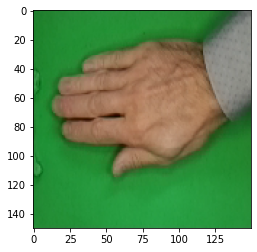

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('gambar tidak diketahui')